In [1]:
#import all the necessary libraries
import numpy as np #provides high-performance multidimensional array with manipulation tool
import pandas as pd #Python-based data analysis toolkit
import matplotlib.pyplot as plt #plotting library for the Python and its numerical mathematics extension NumPy.
import seaborn as sns #Python data visualization library based on matplotlib
import math #To use mathematical functions
import matplotlib
import sklearn #most useful library for machine learning and statistical modelling
import scipy #uses NumPy for more mathematical functions
import warnings #provided to warn the developer of situations that aren’t necessarily exceptions
warnings.filterwarnings('ignore')

In [2]:
#import the datasets
df1 = pd.read_csv("train_ctrUa4K.csv")
df2 = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_original = df1.copy()
test_original = df2.copy()

In [7]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
#check for the detailed datatypes of the training dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#check for the detailed datatypes of the training dataset 
df2.info()

In [11]:
#Rowss and columns details
df1.shape, df2.shape

((614, 13), (367, 12))

## EDA

### Univariate Analysis

In [7]:
# count the values as per loan status
df1["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
#proportion wise value counts
df1["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

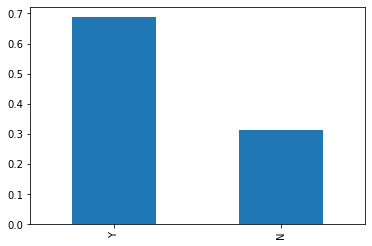

In [8]:
df1["Loan_Status"].value_counts(normalize = True).plot.bar()

In [9]:
# Form a subset of categoricl variables
Cat_col =df1[['Gender','Married','Education','Dependents','Property_Area','Self_Employed']]
Con_col =df1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
              'Loan_Amount_Term', 'Credit_History']]

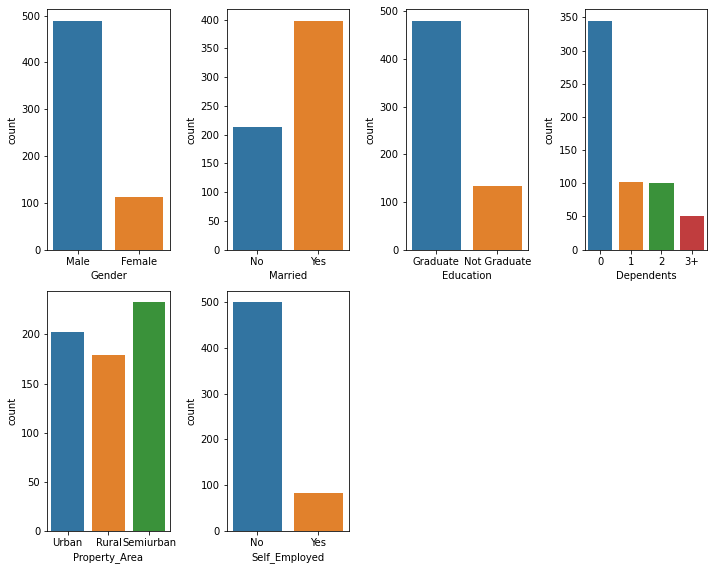

In [13]:
#Barplot plot for the CATEGORICAL variables

fig = plt.figure(figsize=(10,8))
for i in range(len(Cat_col.columns)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=Cat_col.iloc[:,i], data=Cat_col.dropna())
#    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

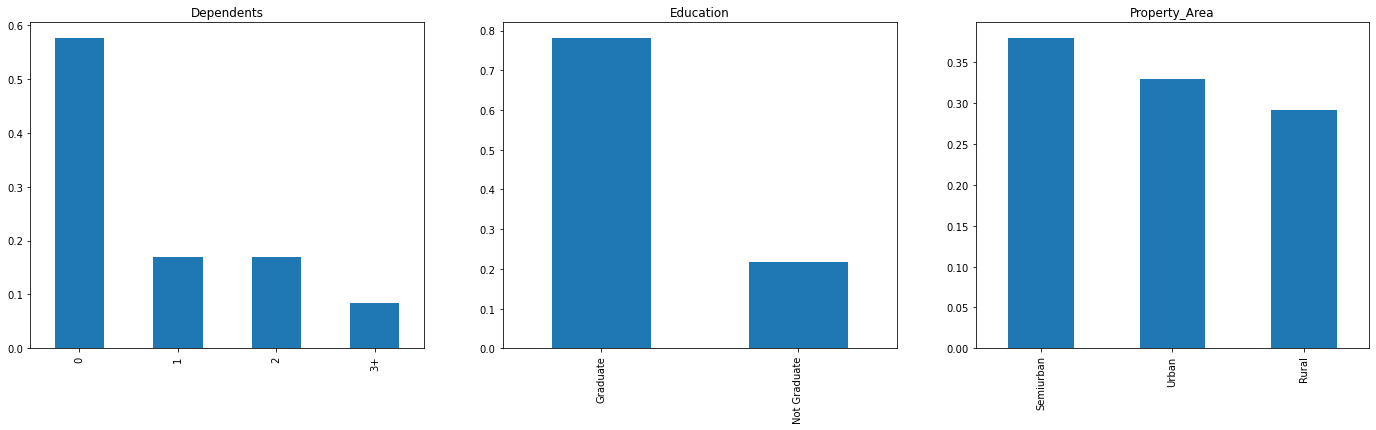

In [14]:
plt.figure(1) 
plt.subplot(131)
df1['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Dependents')
plt.subplot(132)
df1['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
df1['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()


<Figure size 432x288 with 0 Axes>

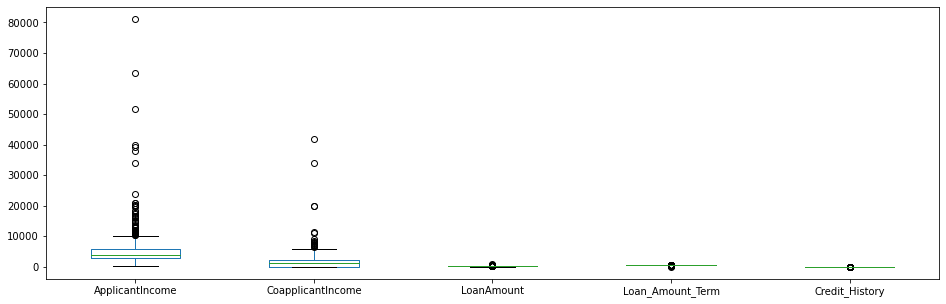

In [23]:
#Check with the distribution of each one of the attributes
plt.figure(1) 
Con_col.plot.box(figsize = (16,5))
plt.show()

<Figure size 432x288 with 0 Axes>

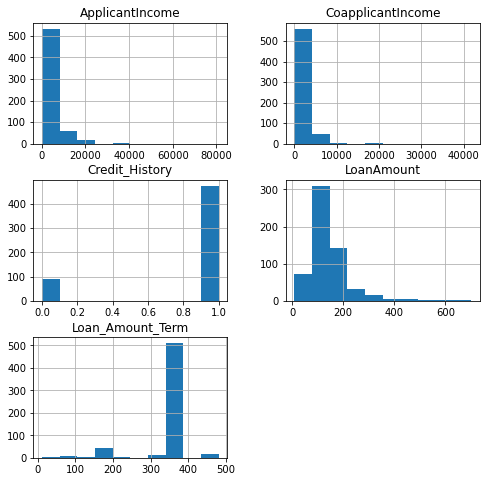

In [29]:
#histogram plot for the continuous variables
plt.figure(1)
Con_col.hist(figsize= (8,8))
plt.show()

### Bivariate Analysis

<Figure size 432x288 with 0 Axes>

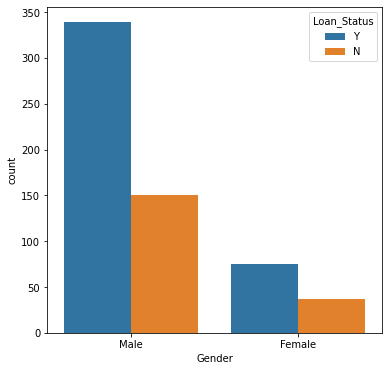

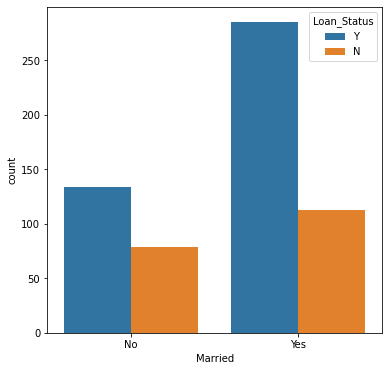

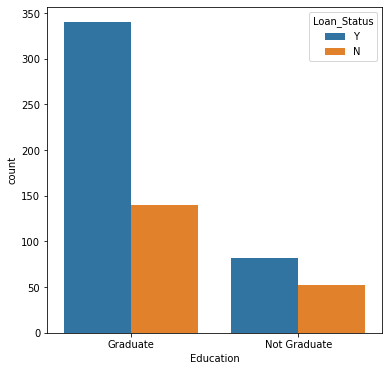

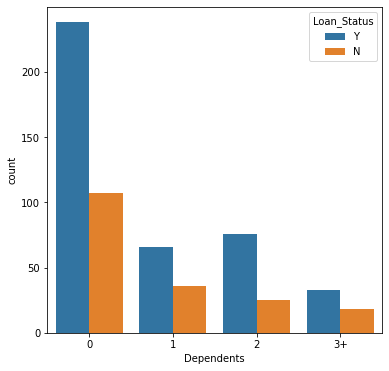

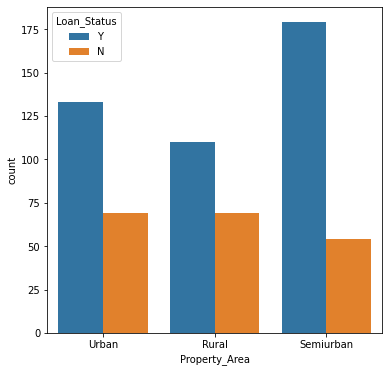

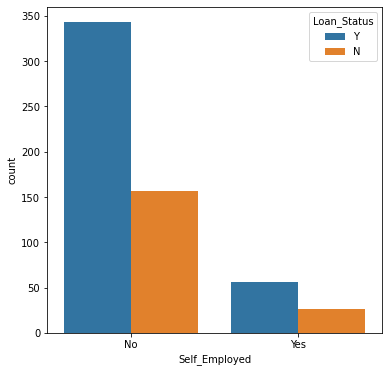

In [32]:
plt.figure(1) 
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df1, hue='Loan_Status')
plt.figure(figsize=(6,6))
sns.countplot(x='Married', data=df1, hue='Loan_Status')
plt.figure(figsize=(6,6))
sns.countplot(x='Education', data=df1, hue='Loan_Status')
plt.figure(figsize=(6,6))
sns.countplot(x='Dependents', data=df1, hue='Loan_Status')
plt.figure(figsize=(6,6))
sns.countplot(x='Property_Area', data=df1, hue='Loan_Status')
plt.figure(figsize=(6,6))
sns.countplot(x='Self_Employed', data=df1, hue='Loan_Status')
plt.show()

In [34]:
#Replace the Loan Status into numerical values
df1.replace({"Loan_Status":{'N':0.0,'Y':1.0}},inplace=True)

### Correlation Matrix

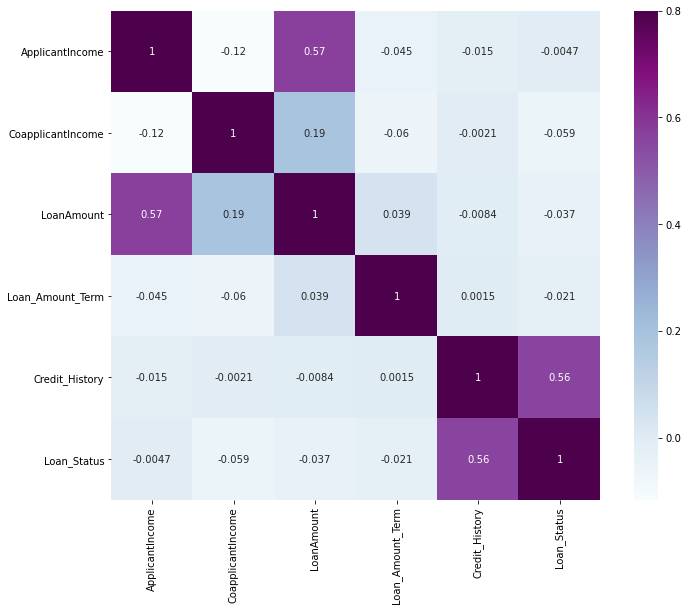

In [97]:
corrmat = df1.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, annot = True, vmax = .8, square = True, cmap ='BuPu') 
plt.show() 

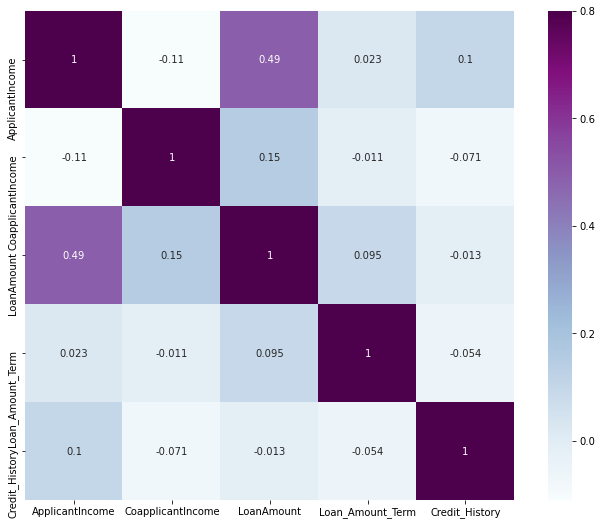

In [98]:
corrmat = df2.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, annot = True, vmax = .8, square = True, cmap ='BuPu') 
plt.show() 

## DATA CLEANING 

### Missing value treatment

Replace the categorical values with Mode and continuous values with Median
PS- As the Gender wise column is controversial to replace with the mode values, hence we will let them be.



### Train data

In [72]:
df1[df1.columns[df1.isnull().any()]].isnull().sum()
# presence of missing values in the following

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [5]:
 # Importing the statistics module
from statistics import mode 

In [35]:
#Replacement for categorical values- trained data
for i in ['Gender','Dependents', 'Married', 'Self_Employed']:
    df1[i].fillna(df1[i].mode()[0], inplace=True)

In [36]:
#Replacement for continuous values- trained data
for j in ['LoanAmount', 'Loan_Amount_Term','Credit_History']:
    df1[j].fillna(df1[j].median(), inplace=True)

In [30]:
df1[df1.columns[df1.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [9]:
#data types for the trained data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Test data

In [10]:
df2[df2.columns[df2.isnull().any()]].isnull().sum()
# presence of missing values in the following

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

In [37]:
#Replacement for categorical values- test data
for i in ['Gender','Dependents','Self_Employed']:
    df2[i].fillna(df2[i].mode()[0], inplace=True)

In [38]:
#Replacement for continuous values- test data
for j in ['LoanAmount', 'Loan_Amount_Term','Credit_History']:
    df2[j].fillna(df2[j].median(), inplace=True)

In [13]:
df2[df2.columns[df2.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [14]:
#data types for the test data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Duplicate Value treatment
Check for the no. of duplicate values and treat them as required

In [55]:
print("total number of duplicates =",len(df1[df1.duplicated()]))

total number of duplicates = 0


In [56]:
print("total number of duplicates =",len(df2[df2.duplicated()]))

total number of duplicates = 0


### Outliers treatment
Check for the Outliers among all the attributes

In [123]:
outliers =[]
def detect_outliers(df1):
    threshold = 3
    mean = np.mean(df1)
    std = np.std(df1)
    
    for y in df1:
        z_score = (y-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(y)
    return outliers 

In [124]:
#detection of outliers in the amount column
outliers_datapoints = detect_outliers(df1['ApplicantIncome']) 
print(outliers_datapoints)
#very few nos of datapoints are in the Outlier Zone

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]


###  Feature Engineering
Form a new column 'Total Income' which is the combination of ApplicantIncome and CoapplicantIncome

Drop the unnecessary columns from the dataset

In [10]:
df1['TotalIncome']= df1['ApplicantIncome'] + df1['CoapplicantIncome']

In [11]:
df2['TotalIncome']= df2['ApplicantIncome'] + df2['CoapplicantIncome']

### Log Transformation
It is being done in order to reduce skewness

Applied to Applicant income, Coapplicant Income, Loan Amount, Loan Amount Term, Credit History

In [39]:
df1[['ApplicantIncome_log','CoapplicantIncome_log', 'LoanAmount_log','Loan_Amount_Term_log']]= np.log(df1[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [40]:
df2[['ApplicantIncome_log','CoapplicantIncome_log', 'LoanAmount_log','Loan_Amount_Term_log']]= np.log(df2[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [12]:
df1[['TotalIncome_log', 'LoanAmount_log','Loan_Amount_Term_log']]= np.log(df1[['TotalIncome', 'LoanAmount','Loan_Amount_Term']])

In [13]:
df2[['TotalIncome_log', 'LoanAmount_log','Loan_Amount_Term_log']]= np.log(df2[['TotalIncome', 'LoanAmount','Loan_Amount_Term']])

In [129]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1.0,5849.0,8.674026,4.852030,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,6091.0,8.714568,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,3000.0,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,4941.0,8.505323,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,6000.0,8.699515,4.948760,5.886104


In [130]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,4.700480,5.886104
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,4.836282,5.886104
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,5.337538,5.886104
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,4.605170,5.886104
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,4.356709,5.886104


In [41]:
#drop unnecessary columns for trained data
col = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df1 = df1.drop(columns=col, axis=1)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1.0,8.674026,-inf,4.852030,5.886104
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0.0,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1.0,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1.0,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1.0,8.699515,-inf,4.948760,5.886104


In [42]:
#drop unnecessary columns for test data
col = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df2 = df2.drop(columns=col, axis=1)
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,8.651724,-inf,4.700480,5.886104
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,8.031385,7.313220,4.836282,5.886104
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,8.517193,7.495542,5.337538,5.886104
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,7.757906,7.842279,4.605170,5.886104
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,8.094378,-inf,4.356709,5.886104


### Label encoding- 
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    df1[col] = le.fit_transform(df1[col])

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [45]:
#Droping the load id from both the datasets and naming them as train n test
train = df1.drop('Loan_ID', axis = 1)
test = df2.drop('Loan_ID', axis = 1)

In [46]:
#check to replace inf with 1
from numpy import inf
train[train == -inf] = 1

In [47]:
#check to replace inf with 1
test[test == -inf] = 1

In [48]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,1.0,8.674026,1.000000,4.852030,5.886104
1,1,1,1,0,0,1.0,0,0.0,8.430109,7.318540,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1.0,8.006368,1.000000,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1.0,7.856707,7.765569,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1.0,8.699515,1.000000,4.948760,5.886104


In [49]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,1,0,0,0,1.0,2,8.651724,1.000000,4.700480,5.886104
1,1,1,1,0,0,1.0,2,8.031385,7.313220,4.836282,5.886104
2,1,1,2,0,0,1.0,2,8.517193,7.495542,5.337538,5.886104
3,1,1,2,0,0,1.0,2,7.757906,7.842279,4.605170,5.886104
4,1,0,0,1,0,1.0,2,8.094378,1.000000,4.356709,5.886104


## Model Training

In [50]:
# specify input and output attributes using feature and targets
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [22]:
# Build dummies for label encoding
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [51]:
#Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split

In [52]:
#import the classes associated with the modules required for training the dataset
import sklearn.metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score  #For K-fold cross validation

### Check for Class imbalance
As we can witness, that there has been quite an imbalance in the transaction data based on Class ie,

Loan_Provided : 422

Loan_Rejected : 192

Hence, in order to reduce such class imbalance, we must opt for two processes
1. Random Over Sampling
2. Random Under Sampling

In [53]:
#to deal with sampling techniques, we need to install the following package
!pip install imblearn

In [54]:
#Install the modules associated with this package
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [55]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification # to generate a random n class classification problem

#x, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1.0: 422, 0.0: 192})


#### Random Under Sampling

In [56]:
#Use of random under sampling method 
rus = RandomUnderSampler(random_state=42)

x_rus, y_rus = rus.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0.0: 192, 1.0: 192})


#### Random Over Sampling

In [57]:
#Use of random over sampling method 
ros = RandomOverSampler(random_state= 42)

x_ros, y_ros = ros.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({1.0: 422, 0.0: 422})


#### SMOTE

In [58]:
#Use of random over sampling method 
ros1 = SMOTE(random_state= 42)

x_ros1, y_ros1 = ros.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_ros1))

Resampled dataset shape Counter({1.0: 422, 0.0: 422})


In [59]:
#import the Decision tree module
from sklearn.tree import DecisionTreeClassifier

In [60]:
#. Logistic Regression - using Random under Sampling
#split the data into train and validation sets
x_train,x_val,y_train,y_val = train_test_split(x_ros,y_ros, test_size = 0.3, random_state = 0)

#train the model
dte = DecisionTreeClassifier()
dte.fit(x_train, y_train)

#predict the model
y_pred = dte.predict(x_val)

#check for the accuracy score
print(f"Accuracy_Score_of_Decision_Tree_Classifier(ROS): {accuracy_score(y_pred, y_val)}")
score = cross_val_score(dte, x_ros, y_ros, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy_Score_of_Decision_Tree_Classifier(ROS): 0.8307086614173228
Cross validation is 85.66638489715413


In [62]:
#Predict the same for the test dataset
y_pred_test = dte.predict(test)

### Check with the submission dataset

In [63]:
submission = pd.read_csv("sample_submission_49d68Cx (1).csv")

In [64]:
submission['Loan_Status'] = y_pred_test

In [65]:
submission['Loan_ID'] = test_original['Loan_ID']

In [66]:
#convert predictions from Y/N to 1/0
submission.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [67]:
submission.replace({"Loan_Status":{0 : 'N',1 :'Y'}},inplace=True)

In [69]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('Decision Tree_ROS_log.csv', index = False)